# **Portfolio 3: Power Consumption**

**Name:** Siti Zaharah Binti Edi

**Email:**  zaharahedi@gmail.com

**Phone:**  011 53580170


# **1. Data Collection and Exploration**

**Source Dataset:** Maven Analytics

**Google Drive Link :**

https://drive.google.com/drive/folders/1715lY7u1fhAXcxh9OridpvclHfY0yogU?usp=drive_link

In [ ]:
#Import libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the paths to CSV files in Google Drive
data_path = '/content/drive/MyDrive/Portfolio Data Scientist - Siti Zaharah Binti Edi/Power Consumption (RawDataset).csv'

# Load the data from the CSV files
df = pd.read_csv(data_path)

df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,NaN,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


***Description:***

---

- **Power Consumption:** Power consumption refers to the rate at which electrical energy is used by a device or system over a specific period, typically measured in watts or kilowatt-hours.

- **Project Overview:** In this project, we are utilizing an electricity consumption in Morocco measured at 10 minute intervals across 3 zones, including environmental factors such as temperature, humidity, and wind speed.

***Description of Features:***

---

- **Datetime:** The date and time of the recorded data.
- **Temperature:** The temperature at the given time in degrees (Celsius or Fahrenheit).
- **Humidity:** The percentage of moisture in the air at the given time.
- **WindSpeed:** The speed of the wind measured at the time.
- **GeneralDiffuseFlows:** The total amount of diffuse solar radiation reaching the ground.
- **DiffuseFlows:** The amount of solar radiation reaching the ground, scattered by the atmosphere.
- **PowerConsumption_Zone1:** The power consumed in Zone 1.
- **PowerConsumption_Zone2:** The power consumed in Zone 2.
- **PowerConsumption_Zone3:** The power consumed in Zone 3.

***Objective:***

---

- To predict power consumption in specific zones based on environmental factors and other zone-based power consumption metrics.
- To compare the performance of three regression algorithms (Decision Tree Regression, CatBoost Regression and XGBoost Regression) in predicting overall or specific power consumption.
- To identify the best-performing model based on evaluation metrics such as R-squared, Mean Squared Error (MSE) and Mean Absolute Error (MAE).


***Regression Analysis:***

---

**Description:**
- Regression analysis is a statistical technique used to examine the relationship between a dependent variable and one or more independent variables, allowing for predictions and insights about how changes in the independent variables impact the dependent variable.


***Types of Regression Analysis:***

---

**Decision Tree Regression:**
- machine learning algorithm that predicts continuous target values by splitting data into branches based on decision rules derived from feature values.

**XGBoost Regression:**
- XGBoost Regression uses gradient boosting and decision trees to optimize predictions for improved accuracy.

**CatBoost Regression:**
- High-performance, gradient-boosting algorithm designed for predictive modeling, optimized for categorical features and fast execution.

In [ ]:
# Display data description
data_description = df.describe(include='all')
data_description

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416,52411.000000,52412.000000,52413.000000,52410.000000,52413.000000,52416.000000,52416.000000,52416.000000
unique,52416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/1/2017 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18.810195,68.258686,1.959504,182.703204,75.032308,32344.970564,21042.509082,17835.406218
std,NaN,5.815401,15.551176,2.348865,264.400900,124.213212,7130.562564,5201.465892,6622.165099
min,NaN,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,NaN,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,NaN,18.780000,69.860000,0.086000,5.036000,4.463000,32265.920340,20823.168405,16415.117470
75%,NaN,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420


***Descriptive Statistics:***

---

**PowerConsumption_Zone1:**
- **Count:** 52416 Datetime
- **Mean:** 32344.97
- **Standard Deviation (Std):** 7130.56
- **Minimum:** 13895.69
- **Maximum:** 52204.39
- **25th Percentile (25%):** 26310.66
- **50th Percentile (50%):** 32265.92
- **75th Percentile (75%):** 37309.01

**PowerConsumption_Zone2:**
- **Count:** 52416 Datetime
- **Mean:** 21042.50
- **Standard Deviation (Std):** 5201.46
- **Minimum:** 8560.08
- **Maximum:** 37408.86
- **25th Percentile (25%):** 16980.76
- **50th Percentile (50%):** 20823.16
- **75th Percentile (75%):** 24713.71

**PowerConsumption_Zone3:**
- **Count:** 52416 Datetime
- **Mean:** 17835.40
- **Standard Deviation (Std):** 6622.16
- **Minimum:** 5935.17
- **Maximum:** 47598.32
- **25th Percentile (25%):** 13129.32
- **50th Percentile (50%):** 16415.11
- **75th Percentile (75%):** 21624.10


**Summary:**
- Zone 1 has the highest average power consumption (32,344.97) among the three zones, with values ranging from 13,895.69 to 52,204.39. Most of the consumption lies between 26,310.66 (25th percentile) and 37,309.01 (75th percentile), indicating moderate variability.
- Zone 2 has a lower average consumption (21,042.50) compared to Zone 1, with a narrower range of 8,560.08 to 37,408.86. Consumption typically falls between 16,980.76 (25th percentile) and 24,713.71 (75th percentile), showing relatively consistent usage.
- Zone 3 has the lowest average consumption (17,835.40), with the widest range among the zones, from 5,935.17 to 47,598.32. Most of the values are between 13,129.32 (25th percentile) and 21,624.10 (75th percentile), suggesting higher variability in consumption patterns.

# **2. Data Cleaning and Preprocessing**

In [ ]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
# Check data types of each column
data_types = df.dtypes

# Display the data types
data_types

,0
Datetime,object
Temperature,float64
Humidity,float64
WindSpeed,float64
GeneralDiffuseFlows,float64
DiffuseFlows,float64
PowerConsumption_Zone1,float64
PowerConsumption_Zone2,float64
PowerConsumption_Zone3,float64


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage.round(2))

Datetime                  0.00
Temperature               0.01
Humidity                  0.01
WindSpeed                 0.01
GeneralDiffuseFlows       0.01
DiffuseFlows              0.01
PowerConsumption_Zone1    0.00
PowerConsumption_Zone2    0.00
PowerConsumption_Zone3    0.00
dtype: float64


In [ ]:
# Input missing values with mean for numerical columns | mode for categorical columns
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        # Fill numerical columns with mean
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':
        # Fill categorical columns with mode
        df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-92-4cf872362954>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-92-4cf872362954>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage.round(2))

Datetime                  0.0
Temperature               0.0
Humidity                  0.0
WindSpeed                 0.0
GeneralDiffuseFlows       0.0
DiffuseFlows              0.0
PowerConsumption_Zone1    0.0
PowerConsumption_Zone2    0.0
PowerConsumption_Zone3    0.0
dtype: float64


In [ ]:
# Recheck the total of missing values for each column
df.isnull().sum()

,0
Datetime,0
Temperature,0
Humidity,0
WindSpeed,0
GeneralDiffuseFlows,0
DiffuseFlows,0
PowerConsumption_Zone1,0
PowerConsumption_Zone2,0
PowerConsumption_Zone3,0


In [ ]:
# Convert Datetime to datetime if not already in that format
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')

df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559000,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414000,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313000,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121000,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,18.810195,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
import pandas as pd

# Assuming 'df' is your dataframe with a datetime column named 'Datetime'
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create 'Date' column from the 'Datetime' column
df['Date'] = df['Datetime'].dt.date

# Create 'Time' column from the 'Datetime' column
df['Time'] = df['Datetime'].dt.time

# Display the first few rows to verify the new columns
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date,Time
0,2017-01-01 00:00:00,6.559000,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01,00:00:00
1,2017-01-01 00:10:00,6.414000,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01,00:10:00
2,2017-01-01 00:20:00,6.313000,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01,00:20:00
3,2017-01-01 00:30:00,6.121000,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01,00:30:00
4,2017-01-01 00:40:00,18.810195,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01,00:40:00


In [ ]:
# Drop Datetime columns
df.drop(columns=['Datetime'], inplace=True)

df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date,Time
0,6.559000,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01,00:00:00
1,6.414000,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01,00:10:00
2,6.313000,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01,00:20:00
3,6.121000,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01,00:30:00
4,18.810195,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01,00:40:00


# **3. Exploratory Data Analysis (EDA) and Data Visualization**

In [ ]:
# Display the data types
data_types

,0
Datetime,object
Temperature,float64
Humidity,float64
WindSpeed,float64
GeneralDiffuseFlows,float64
DiffuseFlows,float64
PowerConsumption_Zone1,float64
PowerConsumption_Zone2,float64
PowerConsumption_Zone3,float64


In [ ]:
# Check for duplicate rows and remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the columns
df['TotalPowerConsumption'] = df['PowerConsumption_Zone1'] + df['PowerConsumption_Zone2'] + df['PowerConsumption_Zone3']

df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date,Time,TotalPowerConsumption
0,6.559000,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01,00:00:00,70425.53544
1,6.414000,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01,00:10:00,69320.84387
2,6.313000,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01,00:20:00,67803.22193
3,6.121000,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01,00:30:00,65489.23209
4,18.810195,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01,00:40:00,63650.44627


In [ ]:
# Encoding function
def freq_encode(df, column_name):
    freq = df[column_name].value_counts()
    return df[column_name].map(freq)

# Apply frequency encoding to the specified columns
df['PowerConsumption_Zone1_encoded'] = freq_encode(df, 'PowerConsumption_Zone1')
df['PowerConsumption_Zone2_encoded'] = freq_encode(df, 'PowerConsumption_Zone2')
df['PowerConsumption_Zone3_encoded'] = freq_encode(df, 'PowerConsumption_Zone3')

# Display the dataframe
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date,Time,TotalPowerConsumption,PowerConsumption_Zone1_encoded,PowerConsumption_Zone2_encoded,PowerConsumption_Zone3_encoded
0,6.559000,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01,00:00:00,70425.53544,2,3,2
1,6.414000,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01,00:10:00,69320.84387,1,3,5
2,6.313000,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01,00:20:00,67803.22193,2,2,1
3,6.121000,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01,00:30:00,65489.23209,1,4,3
4,18.810195,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01,00:40:00,63650.44627,1,3,1


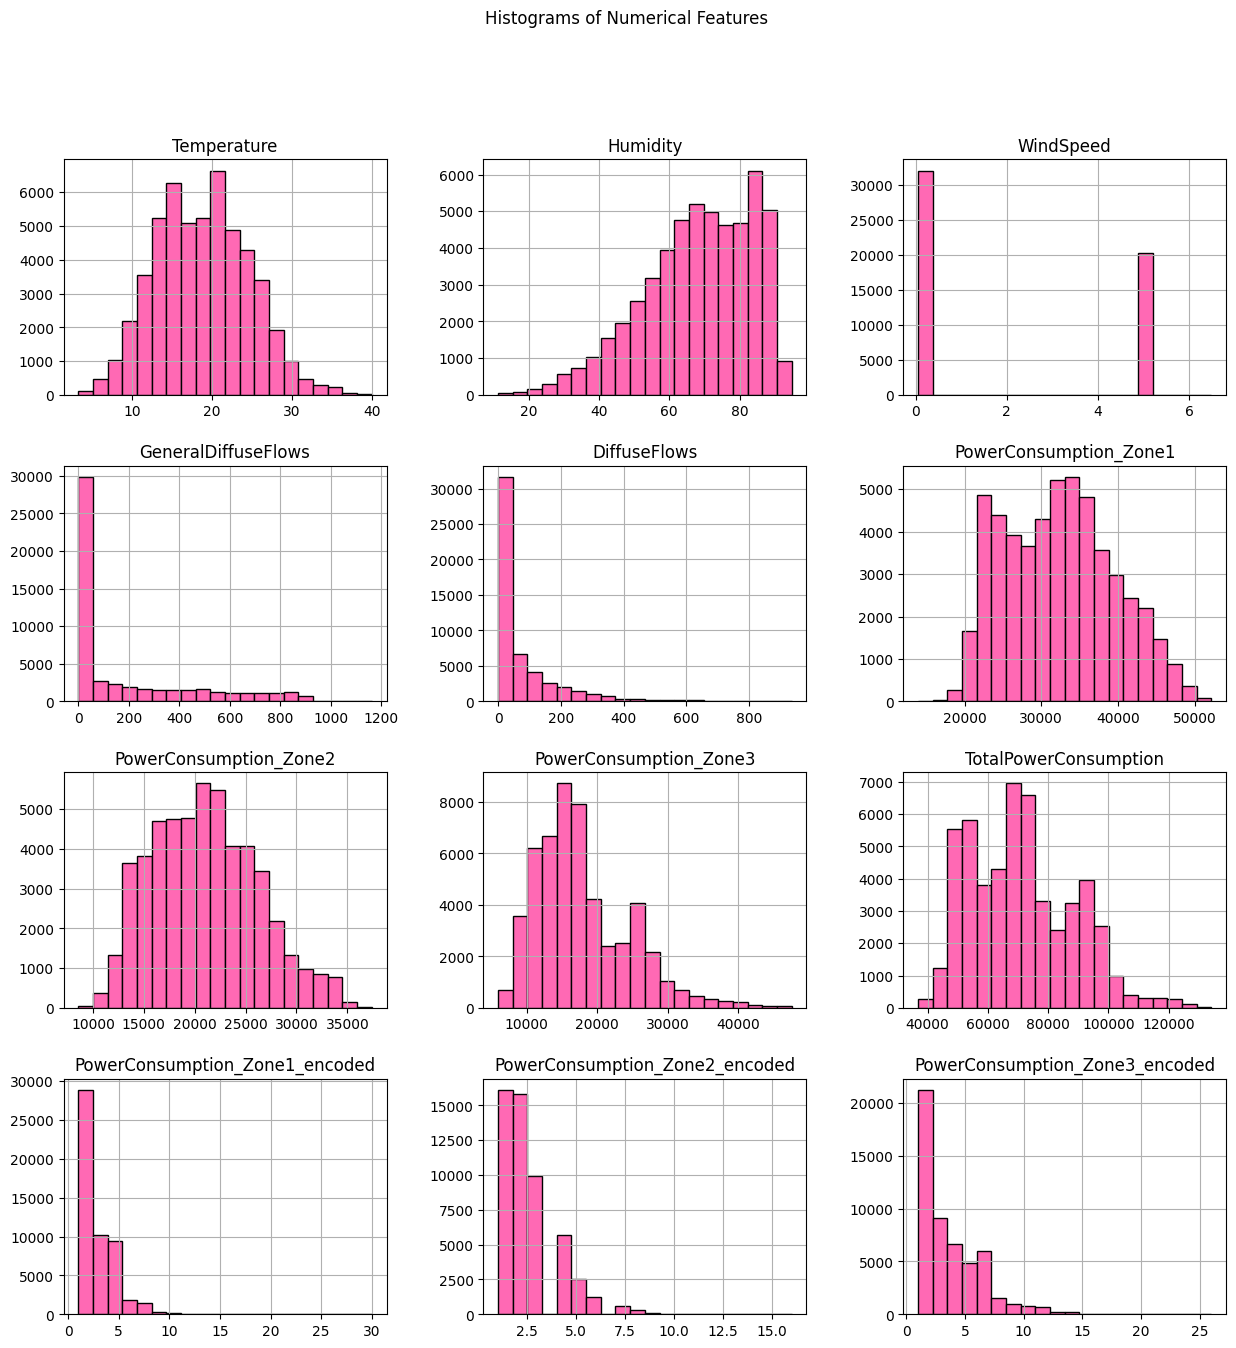

In [ ]:
# Distribution of Numerical Features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(bins=20, figsize=(15, 15), color='hotpink', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

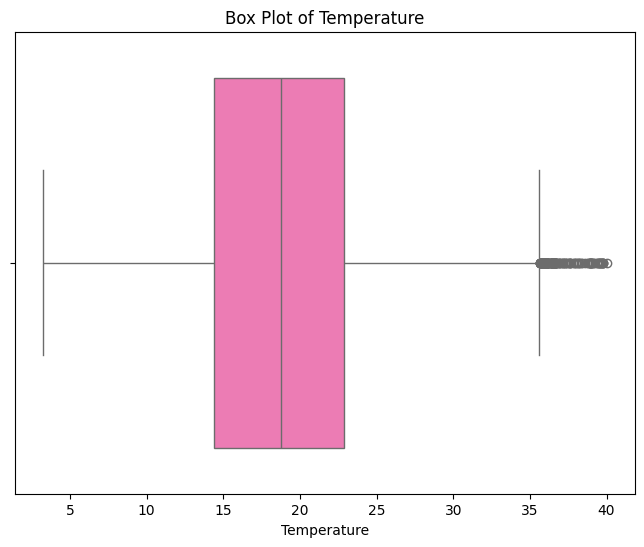

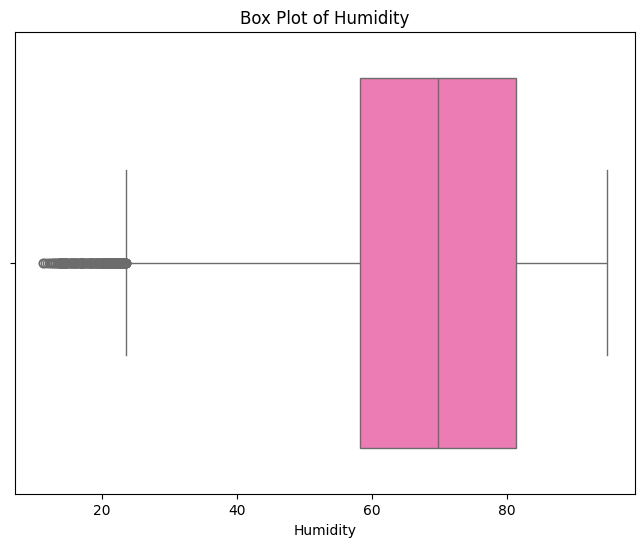

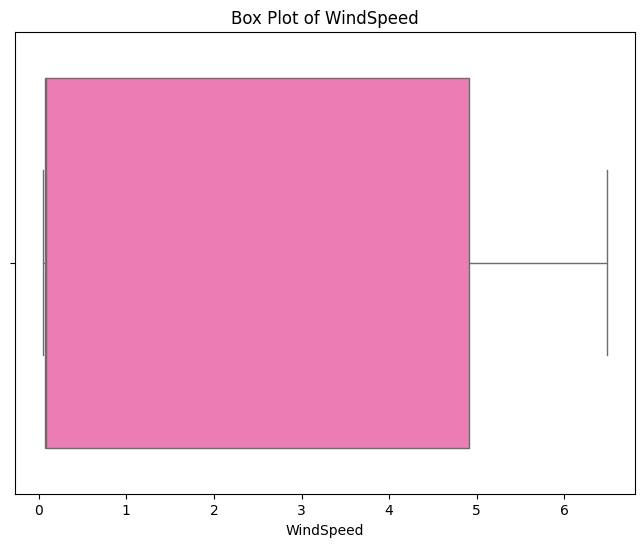

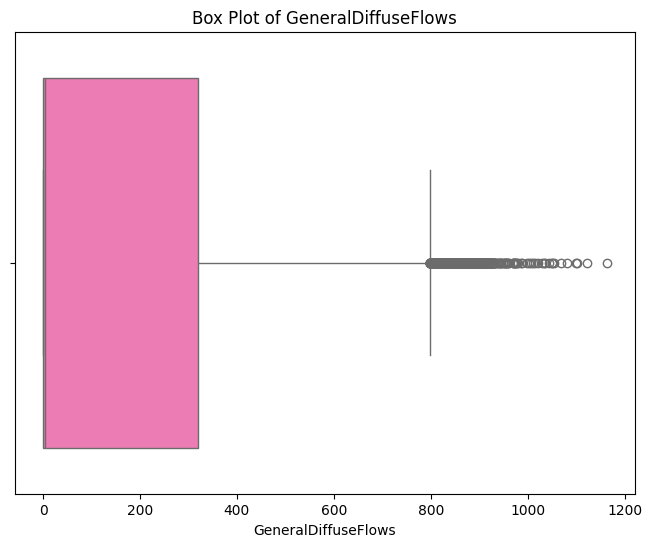

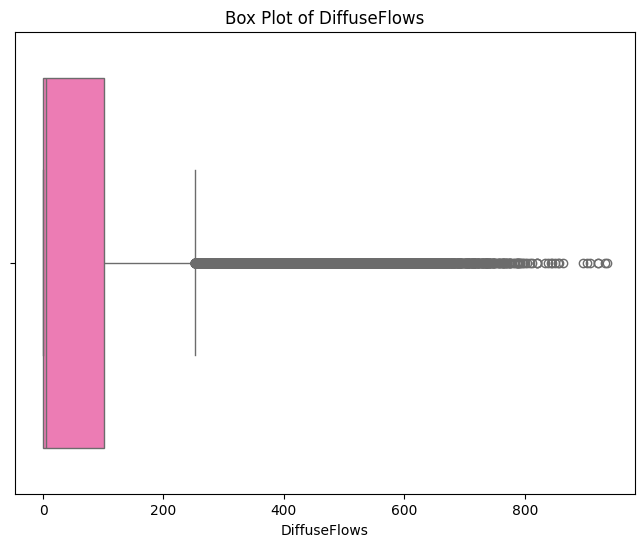

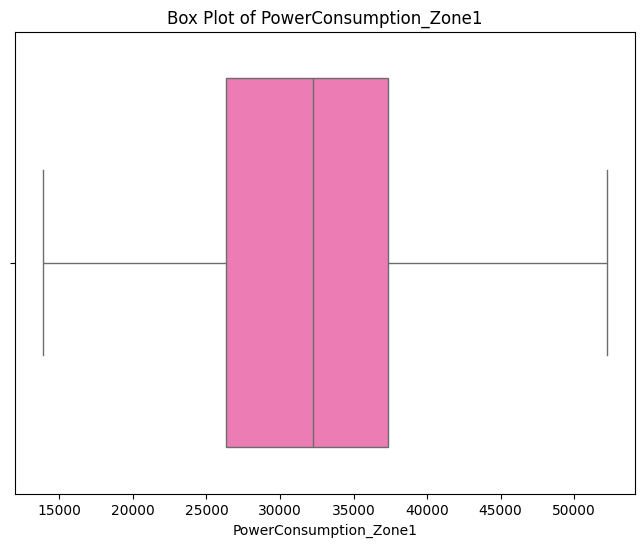

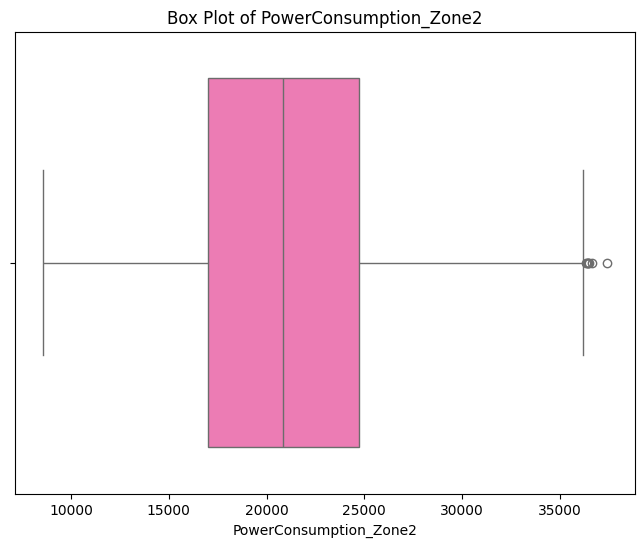

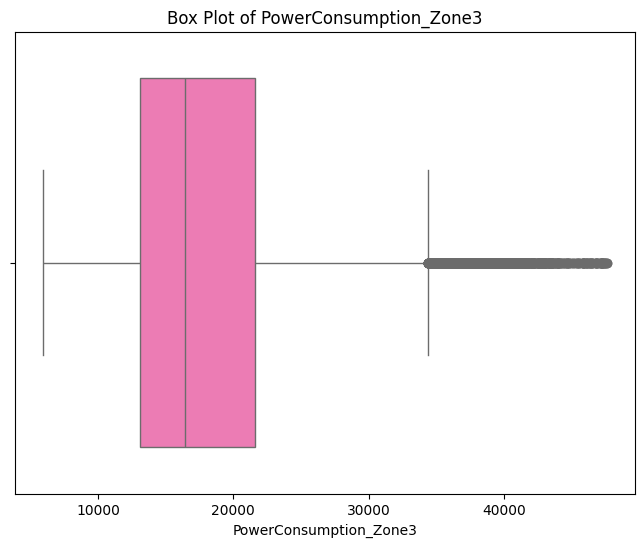

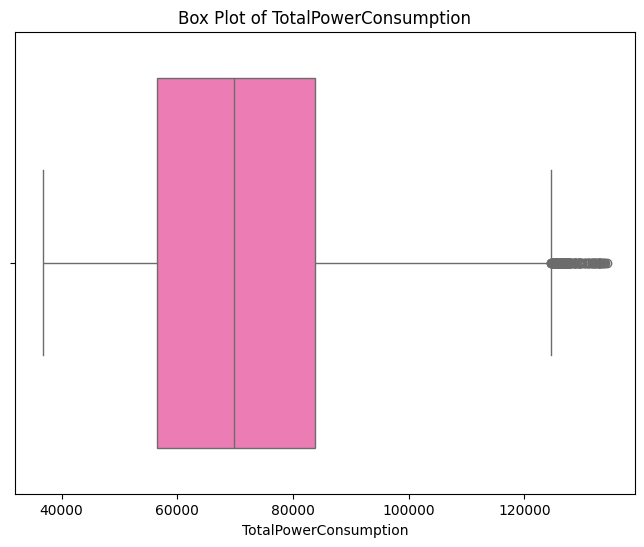

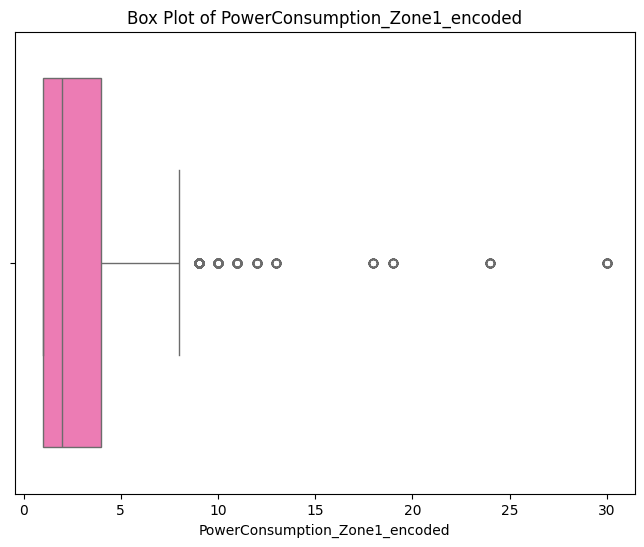

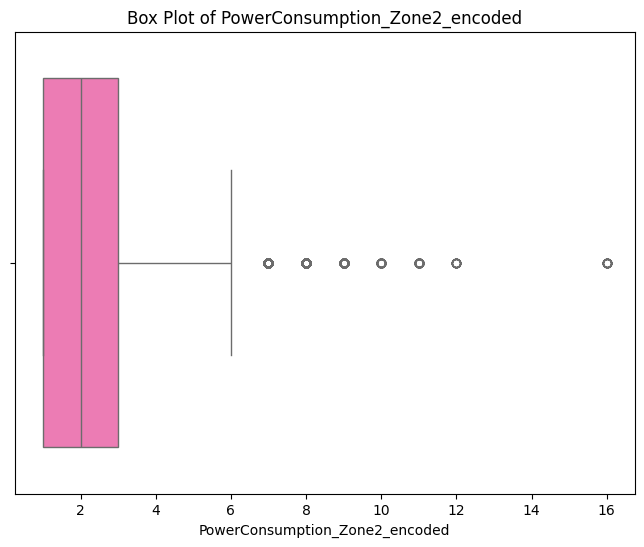

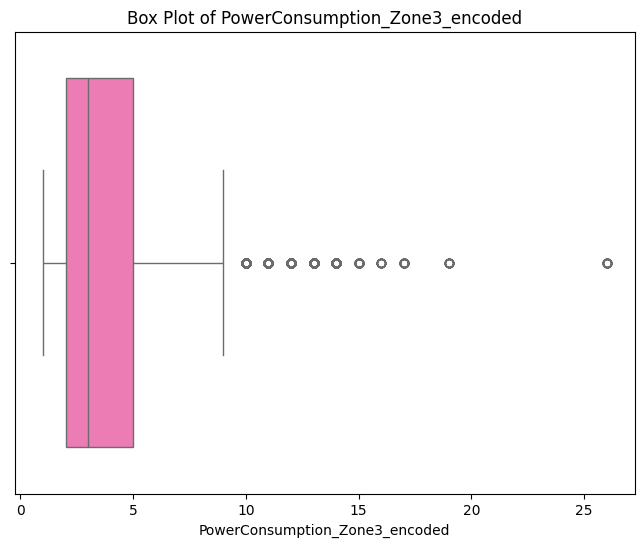

In [ ]:
# Distribution of Numerical Features (Box Plots)
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], color='hotpink')
    plt.title(f'Box Plot of {column}')
    plt.show()

***Key Observations from the Distribution of Numerical Features:***

---
- **Temperature:** A bimodal distribution with peaks around 10 and 20°C.
- **Humidity:** Normally distributed with a peak around 60-70%.
- **WindSpeed:** Skewed towards lower speeds with a long tail indicating some higher wind speeds.
- **GeneralDiffuseFlows:** Heavy right-skewed distribution, indicating many low flow values and a few high outliers.
- **DiffuseFlows:** Similar to GeneralDiffuseFlows but more concentrated around the lower values.
- **PowerConsumption_Zone1:** Right-skewed, with a significant number of lower consumption values and a tail towards higher values.
- **PowerConsumption_Zone2:** Nearly symmetric with a slight right skew, indicating a balanced distribution.
- **PowerConsumption_Zone3:** Right-skewed, similar to PowerConsumption_Zone1, with more concentration at lower values.
- **TotalPowerConsumption:** Right-skewed with a long tail for higher values.
- **PowerConsumption_Zone1_encoded:** Similar distribution to PowerConsumption_Zone1 but compressed.
- **PowerConsumption_Zone2_encoded:** Skewed similarly to PowerConsumption_Zone2, showing more compressed distribution.
- **PowerConsumption_Zone3_encoded:** Skewed distribution similar to PowerConsumption_Zone3, but more concentrated towards lower encoded values.

In [ ]:
import numpy as np
import pandas as pd

# List of columns to transform
columns_to_transform = ['Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'TotalPowerConsumption', 'PowerConsumption_Zone1_encoded', 'PowerConsumption_Zone2_encoded', 'PowerConsumption_Zone3_encoded']

# Apply log transformation and save as new columns
for col in columns_to_transform:
    df[f'log_{col}'] = np.log1p(df[col])  # log1p computes log(x + 1) to handle 0 values

# Check the new columns
print(df.head())

   Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  DiffuseFlows  \
0     6.559000      73.8      0.083                0.051         0.119   
1     6.414000      74.5      0.083                0.070         0.085   
2     6.313000      74.5      0.080                0.062         0.100   
3     6.121000      75.0      0.083                0.091         0.096   
4    18.810195      75.7      0.081                0.048         0.085   

   PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3  \
0             34055.69620             16128.87538             20240.96386   
1             29814.68354             19375.07599             20131.08434   
2             29128.10127             19006.68693             19668.43373   
3             28228.86076             18361.09422             18899.27711   
4             27335.69620             17872.34043             18442.40964   

         Date      Time  ...  PowerConsumption_Zone2_encoded  \
0  2017-01-01  00:00:00  ...

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox

# List of columns to transform
columns_to_transform = ['Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'TotalPowerConsumption', 'PowerConsumption_Zone1_encoded', 'PowerConsumption_Zone2_encoded', 'PowerConsumption_Zone3_encoded']

# Apply Box-Cox transformation and save as new columns
for col in columns_to_transform:
    if df[col].min() > 0:  # Box-Cox requires positive values
        transformed, lambda_ = boxcox(df[col])
        df[f'boxcox_{col}'] = transformed
        print(f"Box-Cox applied to {col}. λ: {lambda_:.2f}")
    else:
        df[f'boxcox_{col}'] = np.nan  # Assign NaN if Box-Cox is not applicable
        print(f"Box-Cox not applicable for {col}, contains non-positive values.")

# Check the new columns
print(df.head())

Box-Cox applied to Humidity. λ: 1.92
Box-Cox applied to WindSpeed. λ: -0.29
Box-Cox applied to GeneralDiffuseFlows. λ: -0.01
Box-Cox applied to DiffuseFlows. λ: -0.02
Box-Cox applied to TotalPowerConsumption. λ: -0.09
Box-Cox applied to PowerConsumption_Zone1_encoded. λ: -0.13
Box-Cox applied to PowerConsumption_Zone2_encoded. λ: -0.15
Box-Cox applied to PowerConsumption_Zone3_encoded. λ: 0.03
   Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  DiffuseFlows  \
0     6.559000      73.8      0.083                0.051         0.119   
1     6.414000      74.5      0.083                0.070         0.085   
2     6.313000      74.5      0.080                0.062         0.100   
3     6.121000      75.0      0.083                0.091         0.096   
4    18.810195      75.7      0.081                0.048         0.085   

   PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3  \
0             34055.69620             16128.87538             20240.96386   
1   

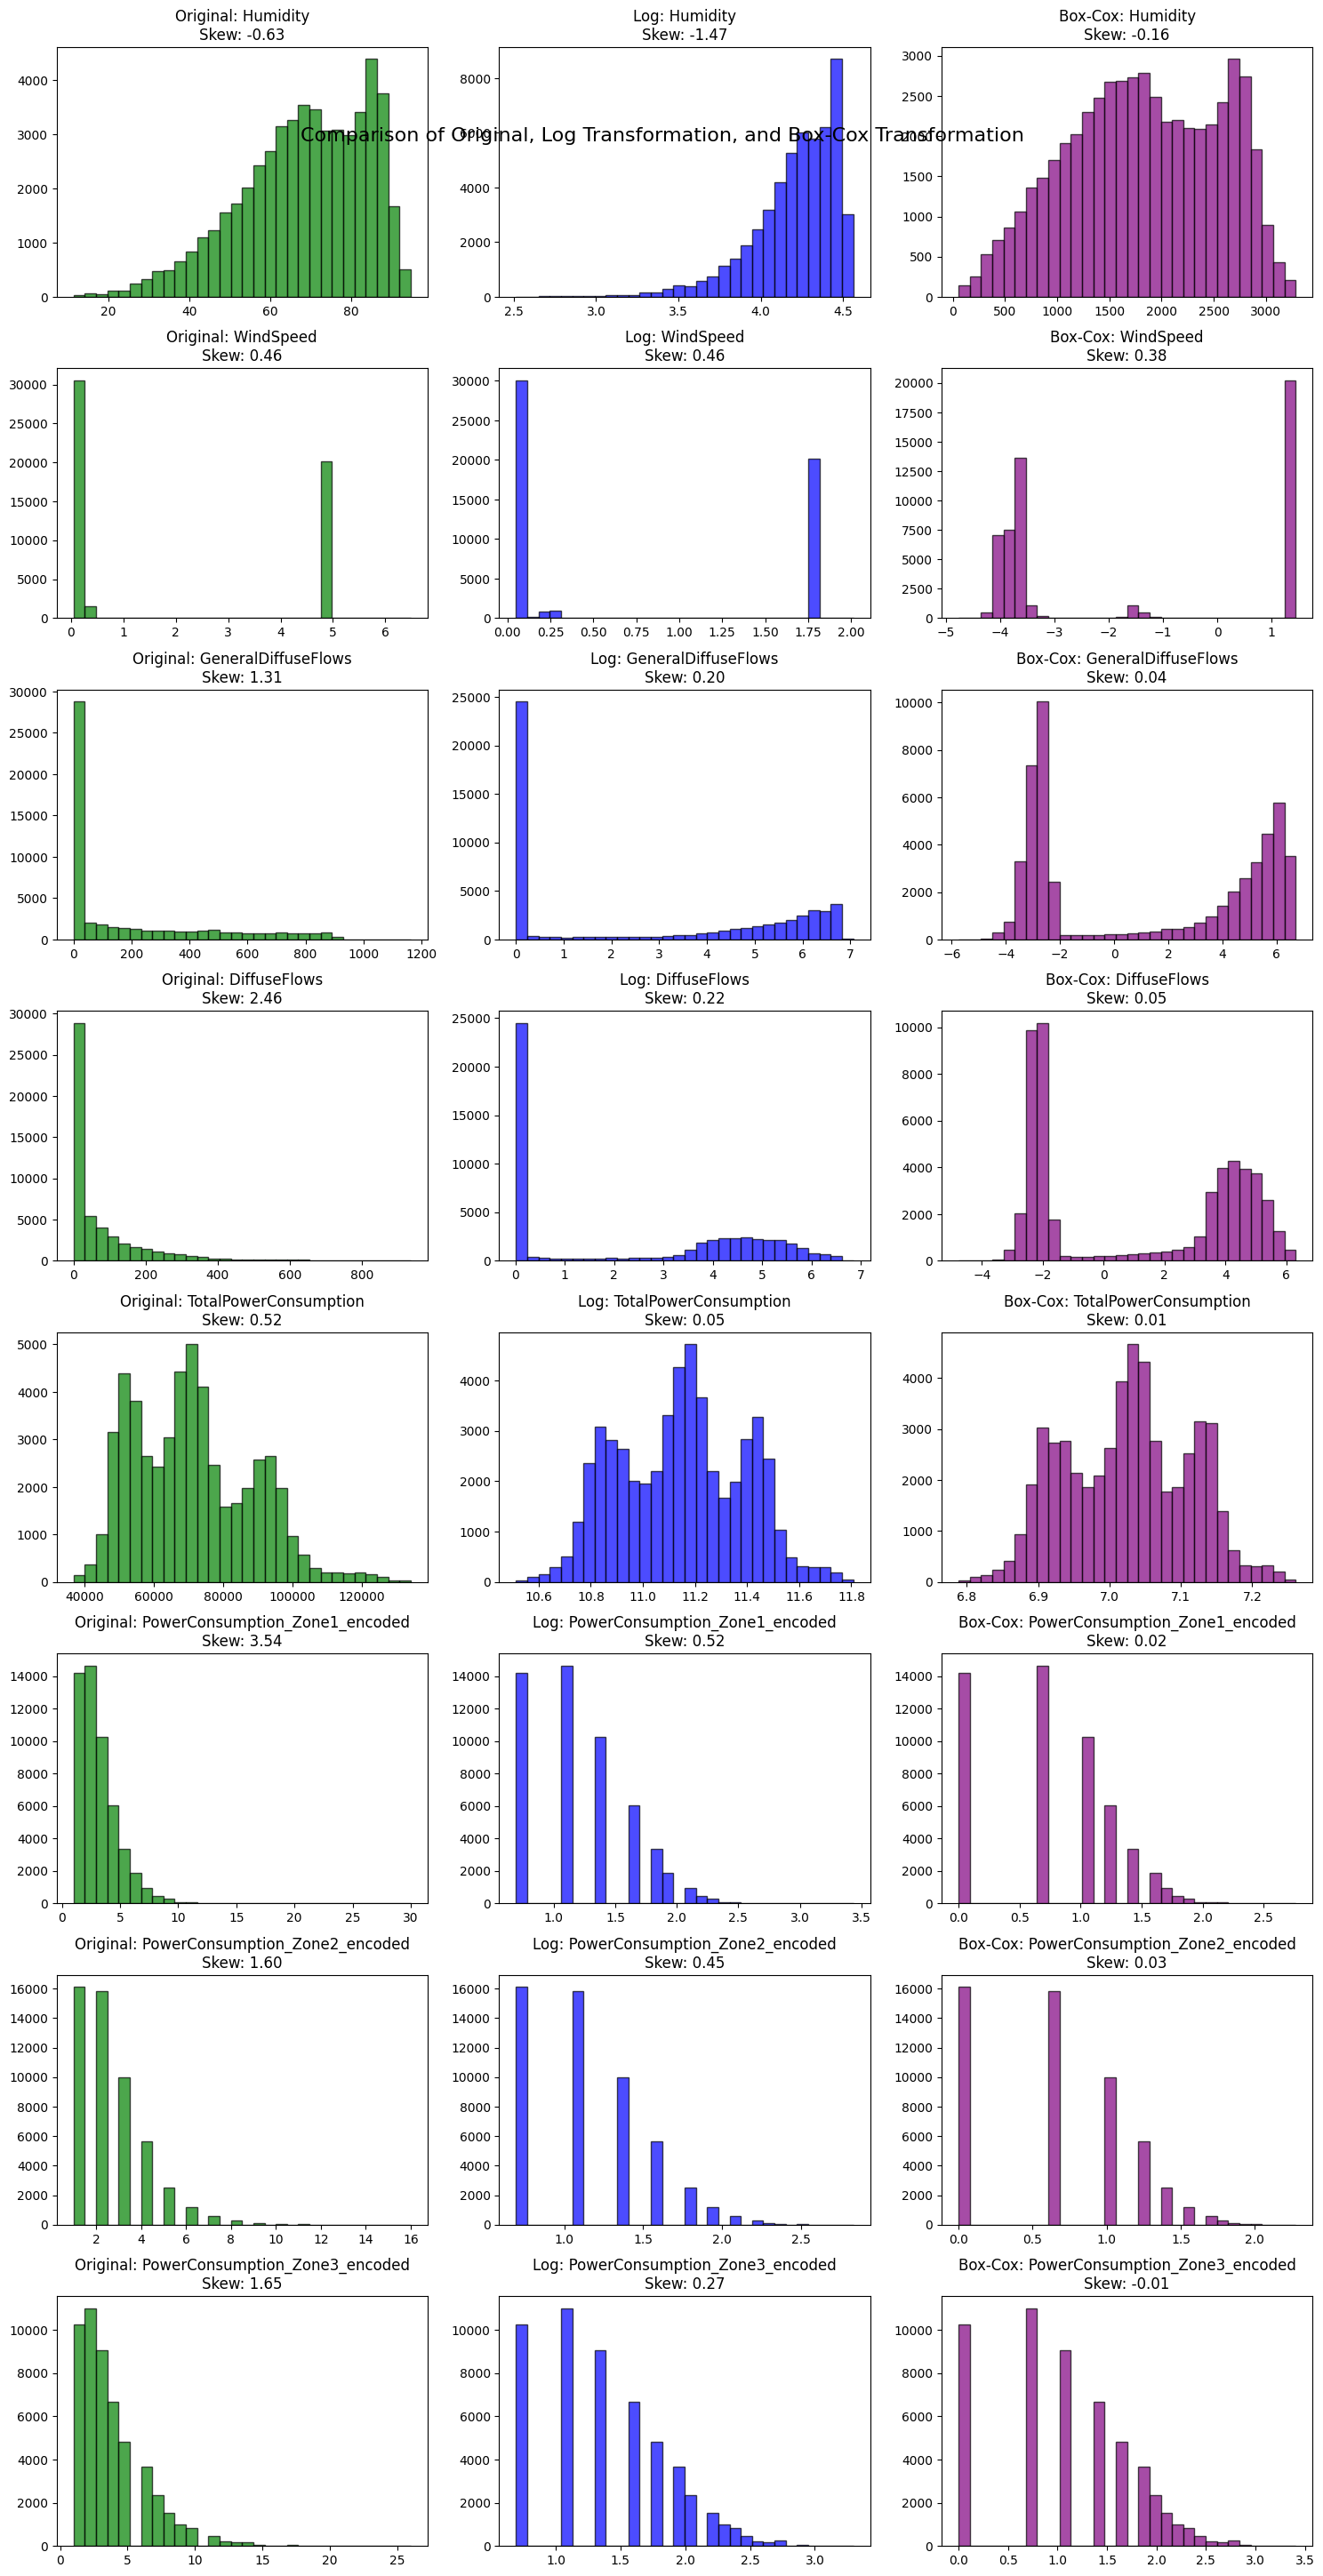

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox, skew

# Create subplots for original, log-transformed, and Box-Cox-transformed histograms
fig, axes = plt.subplots(len(columns_to_transform), 3, figsize=(15, 30))
fig.suptitle('Comparison of Original, Log Transformation, and Box-Cox Transformation', fontsize=16, y=0.92)

# Iterate over each feature
for i, col in enumerate(columns_to_transform):
    original = df[col]
    log_transformed = df[f'log_{col}']
    boxcox_transformed = df[f'boxcox_{col}']

    # Original Data Histogram
    axes[i, 0].hist(original, bins=30, color="green", alpha=0.7, edgecolor="black")
    axes[i, 0].set_title(f"Original: {col}\nSkew: {skew(original):.2f}")

    # Log Transformation Histogram
    axes[i, 1].hist(log_transformed, bins=30, color="blue", alpha=0.7, edgecolor="black")
    axes[i, 1].set_title(f"Log: {col}\nSkew: {skew(log_transformed):.2f}")

    # Box-Cox Transformation Histogram
    axes[i, 2].hist(boxcox_transformed, bins=30, color="purple", alpha=0.7, edgecolor="black")
    axes[i, 2].set_title(f"Box-Cox: {col}\nSkew: {skew(boxcox_transformed):.2f}")

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

***Observations from the distribution diagram:***

---
**Humidity:**
- **Log Transformation:** Reduces skew but still right-skewed.
- **Box-Cox Transformation:** Significantly reduces skew, creating a more symmetric distribution.

**WindSpeed:**
- **Log Transformation:** Skew remains unchanged.
- **Box-Cox Transformation:** Slight improvement in symmetry.

**GeneralDiffuseFlows:**
- **Log Transformation:** Skew is reduced but still noticeable.
- **Box-Cox Transformation:** Significantly reduces skew and becomes more symmetric.

**DiffuseFlows:**
- **Log Transformation:** Reduces skew slightly.
- **Box-Cox Transformation:** Greatly reduces skew and creates a more symmetric distribution.

**TotalPowerConsumption:**
- **Log Transformation:** Greatly reduces skew, making the distribution almost normal.
- **Box-Cox Transformation:** Further reduces skew, but the result is very similar to the log transformation.

**PowerConsumption_Zone1_encoded:**
- **Log Transformation:** Skew is reduced but still present.
- **Box-Cox Transformation:** Further reduces skew and creates a more symmetric distribution.

**PowerConsumption_Zone2_encoded:**
- **Log Transformation:** Slight reduction in skew.
- **Box-Cox Transformation:** Much more pronounced reduction in skew.

**PowerConsumption_Zone3_encoded:**
- **Log Transformation:** Skew is reduced slightly.
- **Box-Cox Transformation:** Results in a much more symmetric distribution with minimal skew.


---
**Overall Comparison:**
- Box-Cox generally performs better at reducing skew and producing more symmetric distributions compared to log transformation, though for some variables, the log transformation may already offer a good enough result.








In [ ]:
#Replace original columns with boxcox
df['Humidity'] = df['boxcox_Humidity']
df['WindSpeed'] = df['boxcox_WindSpeed']
df['GeneralDiffuseFlows'] = df['boxcox_GeneralDiffuseFlows']
df['DiffuseFlows'] = df['boxcox_DiffuseFlows']
df['TotalPowerConsumption'] = df['boxcox_TotalPowerConsumption']
df['PowerConsumption_Zone1_encoded'] = df['boxcox_PowerConsumption_Zone1_encoded']
df['PowerConsumption_Zone2_encoded'] = df['boxcox_PowerConsumption_Zone2_encoded']
df['PowerConsumption_Zone3_encoded'] = df['boxcox_PowerConsumption_Zone3_encoded']

print(df.head())

   Temperature     Humidity  WindSpeed  GeneralDiffuseFlows  DiffuseFlows  \
0     6.559000  2028.708106  -3.645044            -3.041712     -2.184699   
1     6.414000  2065.871449  -3.645044            -2.711706     -2.540504   
2     6.313000  2065.871449  -3.721082            -2.837997     -2.368283   
3     6.121000  2092.614767  -3.645044            -2.439449     -2.411478   
4    18.810195  2130.332532  -3.695333            -3.105065     -2.540504   

   PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3  \
0             34055.69620             16128.87538             20240.96386   
1             29814.68354             19375.07599             20131.08434   
2             29128.10127             19006.68693             19668.43373   
3             28228.86076             18361.09422             18899.27711   
4             27335.69620             17872.34043             18442.40964   

         Date      Time  ...  log_PowerConsumption_Zone2_encoded  \
0  201

In [ ]:
# List of 18 features to drop
columns_to_drop = ['boxcox_Humidity', 'boxcox_WindSpeed', 'boxcox_GeneralDiffuseFlows', 'boxcox_DiffuseFlows', 'boxcox_TotalPowerConsumption', 'boxcox_PowerConsumption_Zone1_encoded', 'boxcox_PowerConsumption_Zone2_encoded', 'boxcox_PowerConsumption_Zone3_encoded',
                   'log_Humidity', 'log_WindSpeed', 'log_GeneralDiffuseFlows', 'log_DiffuseFlows', 'log_TotalPowerConsumption', 'log_PowerConsumption_Zone1_encoded', 'log_PowerConsumption_Zone2_encoded', 'log_PowerConsumption_Zone3_encoded']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

# Check the dataframe to confirm the columns have been dropped
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date,Time,TotalPowerConsumption,PowerConsumption_Zone1_encoded,PowerConsumption_Zone2_encoded,PowerConsumption_Zone3_encoded
0,6.559000,2028.708106,-3.645044,-3.041712,-2.184699,34055.69620,16128.87538,20240.96386,2017-01-01,00:00:00,7.032232,0.663509,1.014089,0.699689
1,6.414000,2065.871449,-3.645044,-2.711706,-2.540504,29814.68354,19375.07599,20131.08434,2017-01-01,00:10:00,7.026458,0.000000,1.014089,1.645004
2,6.313000,2065.871449,-3.721082,-2.837997,-2.368283,29128.10127,19006.68693,19668.43373,2017-01-01,00:20:00,7.018361,0.663509,0.658837,0.000000
3,6.121000,2092.614767,-3.645044,-2.439449,-2.411478,28228.86076,18361.09422,18899.27711,2017-01-01,00:30:00,7.005625,0.000000,1.253545,1.115108
4,18.810195,2130.332532,-3.695333,-3.105065,-2.540504,27335.69620,17872.34043,18442.40964,2017-01-01,00:40:00,6.995151,0.000000,1.014089,0.000000


In [ ]:
# Display percentage of NaN values
nan_percentage = (df.isna().sum() / len(df)) * 100
print("Percentage of NaN values per column:")
print(nan_percentage)

Percentage of NaN values per column:
Temperature                        0.00000
Humidity                           0.00000
WindSpeed                          0.00000
GeneralDiffuseFlows                0.00000
DiffuseFlows                       0.00000
PowerConsumption_Zone1             0.00000
PowerConsumption_Zone2             0.00000
PowerConsumption_Zone3             0.00000
Date                              60.43956
Time                              60.43956
TotalPowerConsumption              0.00000
PowerConsumption_Zone1_encoded     0.00000
PowerConsumption_Zone2_encoded     0.00000
PowerConsumption_Zone3_encoded     0.00000
dtype: float64


In [ ]:
# For 'Date' column
df['Date'].fillna(df['Date'].mode()[0], inplace=True)

# For 'Time' column
df['Time'].fillna(df['Time'].mode()[0], inplace=True)

<ipython-input-110-73aa41667503>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(df['Date'].mode()[0], inplace=True)
<ipython-input-110-73aa41667503>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
# Display percentage of NaN values
nan_percentage = (df.isna().sum() / len(df)) * 100
print("Percentage of NaN values per column:")
print(nan_percentage)

Percentage of NaN values per column:
Temperature                       0.0
Humidity                          0.0
WindSpeed                         0.0
GeneralDiffuseFlows               0.0
DiffuseFlows                      0.0
PowerConsumption_Zone1            0.0
PowerConsumption_Zone2            0.0
PowerConsumption_Zone3            0.0
Date                              0.0
Time                              0.0
TotalPowerConsumption             0.0
PowerConsumption_Zone1_encoded    0.0
PowerConsumption_Zone2_encoded    0.0
PowerConsumption_Zone3_encoded    0.0
dtype: float64


In [ ]:
# Drop rows with NaN
df.dropna(axis=0, inplace=True)

# Drop columns with NaN
df.dropna(axis=1, inplace=True)

In [ ]:
# Display percentage of NaN values
nan_percentage = (df.isna().sum() / len(df)) * 100
print("Percentage of NaN values per column:")
print(nan_percentage)

Percentage of NaN values per column:
Temperature                       0.0
Humidity                          0.0
WindSpeed                         0.0
GeneralDiffuseFlows               0.0
DiffuseFlows                      0.0
PowerConsumption_Zone1            0.0
PowerConsumption_Zone2            0.0
PowerConsumption_Zone3            0.0
Date                              0.0
Time                              0.0
TotalPowerConsumption             0.0
PowerConsumption_Zone1_encoded    0.0
PowerConsumption_Zone2_encoded    0.0
PowerConsumption_Zone3_encoded    0.0
dtype: float64


In [ ]:
#Preparation for Correlation Analysis
# Select only non-numeric datatype
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns #select only non-numeric datatype

# drop non -numeric
df_numeric = df.drop(columns=non_numeric_columns)

# One-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Only select numeric column for correlation matrix
df_numeric = df.select_dtypes(include=[np.number])

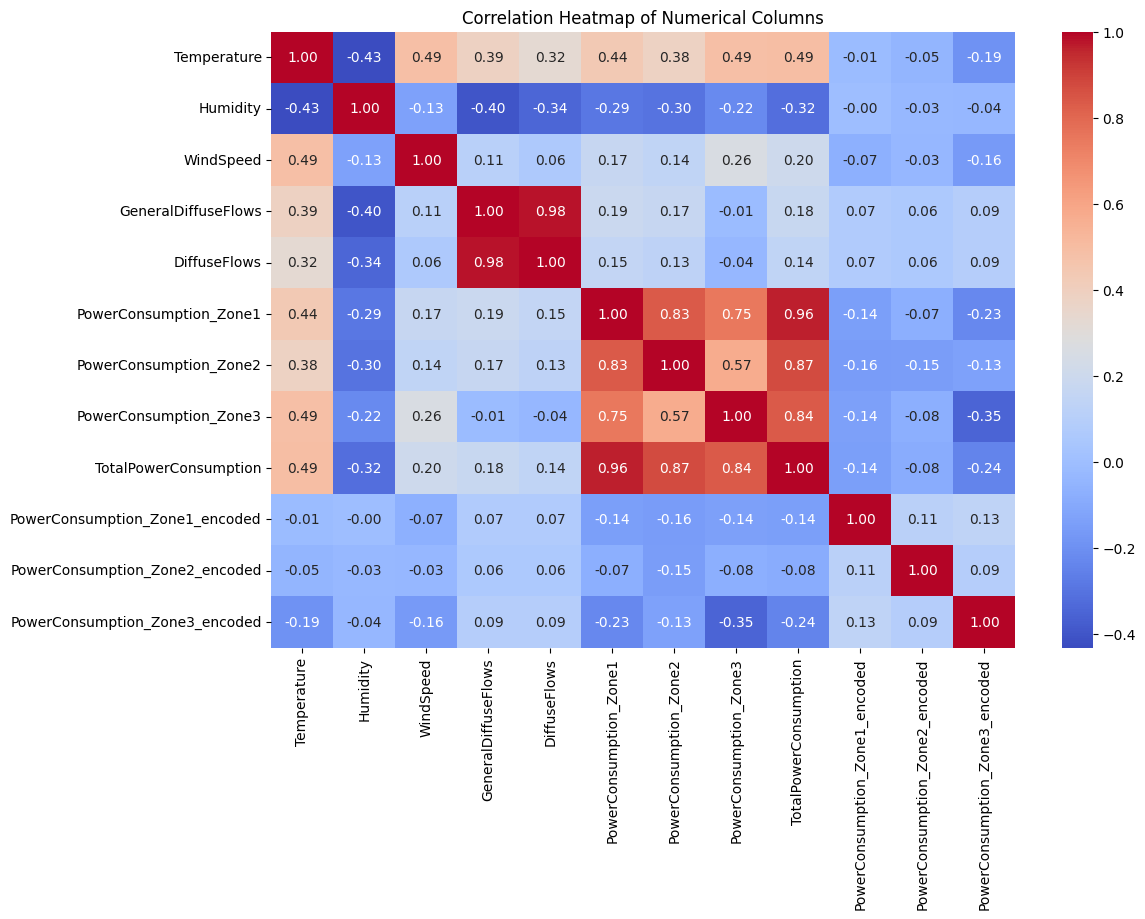

In [ ]:
# Automatically identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

***Observations Correlation Heatmap***


---

- The heatmap shows that Temperature, PowerConsumption_Zone1, PowerConsumption_Zone2, PowerConsumption_Zone3, and TotalPowerConsumption have strong positive correlations, while other variables like Humidity and WindSpeed exhibit weaker or negative correlations with the rest.

- **Note:** This heatmap only includes numerical columns and does not account for any categorical columns.

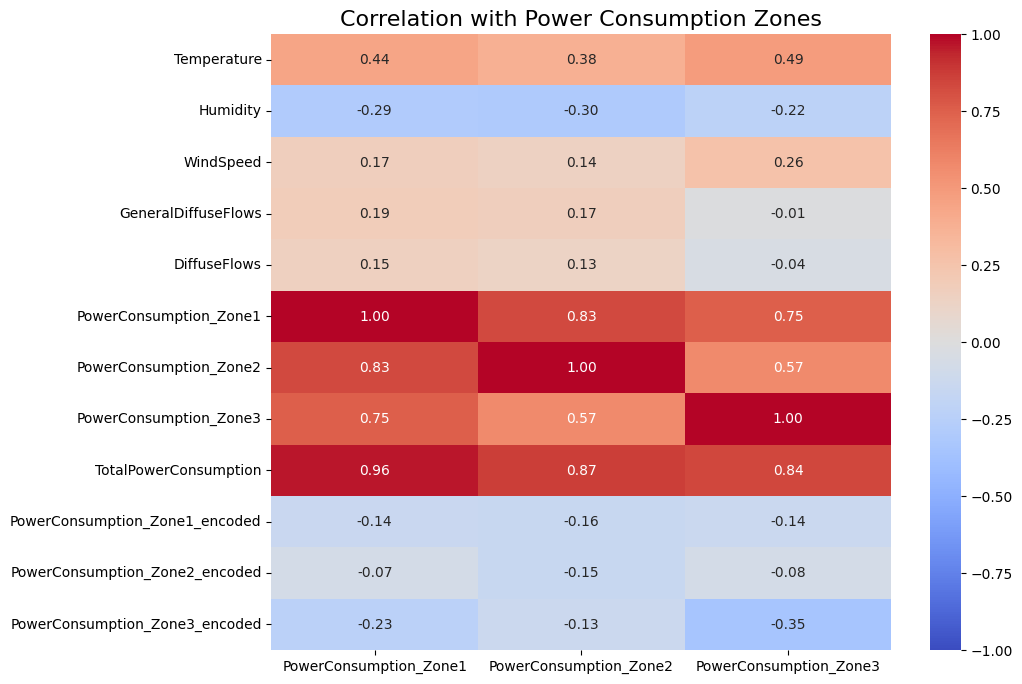

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure df_numeric is defined as a DataFrame with only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Correlation Matrix
corr_matrix = df_numeric.corr()

# Focus on correlations with each zone (Zone 1, Zone 2, Zone 3)
zone_corr = corr_matrix[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(zone_corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation with Power Consumption Zones', fontsize=16)
plt.show()

***Observations Correlation Heatmap on Power Consumption Zone 1,2 and 3***

---

**Strong Relevant Features:**

- **Temperature (0.44, 0.38, 0.47):** Temperature is highly relevant as it affects energy demand for heating or cooling across all zones. A warmer or colder climate increases power consumption.
- **TotalPowerConsumption (0.96, 0.87, 0.84):** Since total power consumption is derived from the zones, it's an obvious strong feature, reflecting combined demand patterns.
- **Wind Speed (0.17, 0.14, 0.23):** Wind Speed may indirectly impact power consumption by influencing heating or cooling needs. Including it helps the model capture weather-related effects on energy demand.
- **GeneralDiffuseFlows (0.19, 0.17, 0.00):** GeneralDiffuseFlows might have limited impact unless your dataset includes zones heavily reliant on solar energy. This feature may add noise to the model rather than improving it.
- **DiffuseFlows (0.15, 0.13, -0.02):** Similar to GeneralDiffuseFlows, it is primarily reflect solar radiation. It could still add value in specific solar-reliant areas where solar power contributes more to energy generation.

<br>**Weak Relevant/Irrelevant Features:**
- **Humidity (-0.29, -0.30, -0.22):** Humidity has a weak and negative correlation with power consumption, as its effect on energy demand is indirect and dependent on extreme weather conditions.


# **4. Features Selection**

In [ ]:
# Define different sets of selected columns
selected_columns = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'TotalPowerConsumption', 'Temperature', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']

# Create separate DataFrames based on these selected columns
df = df[selected_columns]

# Display the first few rows of both DataFrames
print("Strong Relevant Features:")
print(df.head())

Strong Relevant Features:
   PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3  \
0             34055.69620             16128.87538             20240.96386   
1             29814.68354             19375.07599             20131.08434   
2             29128.10127             19006.68693             19668.43373   
3             28228.86076             18361.09422             18899.27711   
4             27335.69620             17872.34043             18442.40964   

   TotalPowerConsumption  Temperature  WindSpeed  GeneralDiffuseFlows  \
0               7.032232     6.559000  -3.645044            -3.041712   
1               7.026458     6.414000  -3.645044            -2.711706   
2               7.018361     6.313000  -3.721082            -2.837997   
3               7.005625     6.121000  -3.645044            -2.439449   
4               6.995151    18.810195  -3.695333            -3.105065   

   DiffuseFlows  
0     -2.184699  
1     -2.540504  
2     -2.368283  


In [ ]:
from sklearn.model_selection import train_test_split

# Drop the target variables from X
X = df.drop(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1)

# Define the target variables
y1 = df['PowerConsumption_Zone1']
y2 = df['PowerConsumption_Zone2']
y3 = df['PowerConsumption_Zone3']

# Split the data into training and testing sets for each target
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)

In [ ]:
# Print shapes of the training and testing sets for each subset
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("y1_train shape:", y1_train.shape)
print("y1_test shape:", y1_test.shape)

print("y2_train shape:", y2_train.shape)
print("y2_test shape:", y2_test.shape)

print("y3_train shape:", y3_train.shape)
print("y3_test shape:", y3_test.shape)


X_train shape: (41932, 5)
X_test shape: (10484, 5)
y1_train shape: (41932,)
y1_test shape: (10484,)
y2_train shape: (41932,)
y2_test shape: (10484,)
y3_train shape: (41932,)
y3_test shape: (10484,)


# **5. Model Training and Evaluation**

## 5.1 Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit and evaluate the model for each target (y1, y2, y3)
for target, y_train_target, y_test_target in zip(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], [y1_train, y2_train, y3_train], [y1_test, y2_test, y3_test]):

    # Fit the model with the feature sets (X_train, y_train)
    dt_model.fit(X_train, y_train_target)

    # Make predictions on the test set
    y_pred_dt = dt_model.predict(X_test)

    # Evaluate the model
    mse_dt = mean_squared_error(y_test_target, y_pred_dt)
    mae_dt = mean_absolute_error(y_test_target, y_pred_dt)
    r2_dt = r2_score(y_test_target, y_pred_dt)

    print(f'Decision Tree Regression for {target}:')
    print(f'Mean Squared Error: {mse_dt}')
    print(f'Mean Absolute Error: {mae_dt}')
    print(f'R-squared: {r2_dt}\n')

Decision Tree Regression for PowerConsumption_Zone1:
Mean Squared Error: 2714761.4342144346
Mean Absolute Error: 1030.1092135635254
R-squared: 0.9462363714571411

Decision Tree Regression for PowerConsumption_Zone2:
Mean Squared Error: 6631808.719207669
Mean Absolute Error: 1557.5958184041397
R-squared: 0.754283097466873

Decision Tree Regression for PowerConsumption_Zone3:
Mean Squared Error: 7203756.677389834
Mean Absolute Error: 1637.200333425887
R-squared: 0.8347933633441956



**Decision Tree Regression:**

---
**PowerConsumption_Zone1:**
- **Mean Squared Error:** 2714761.4342
- **Mean Absolute Error:** 1030.1092
- **R-squared:** 0.9462

**PowerConsumption_Zone2:**
- **Mean Squared Error:** 6631808.7192
- **Mean Absolute Error:** 1557.5958
- **R-squared:** 0.7542

**PowerConsumption_Zone3:**
- **Mean Squared Error:** 7203756.6773
- **Mean Absolute Error:** 1637.2003
- **R-squared:** 0.8347

## 5.2 XGBoost Regression

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBRegressor model
xgb_model = XGBRegressor(random_state=42)

# Fit and evaluate the model for each target (y1, y2, y3)
for target, y_train_target, y_test_target in zip(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], [y1_train, y2_train, y3_train], [y1_test, y2_test, y3_test]):

    # Fit the model with the feature sets (X_train, y_train)
    xgb_model.fit(X_train, y_train_target)

    # Make predictions on the test set
    y_pred_xgb = xgb_model.predict(X_test)

    # Evaluate the model
    mse_xgb = mean_squared_error(y_test_target, y_pred_xgb)
    mae_xgb = mean_absolute_error(y_test_target, y_pred_xgb)
    r2_xgb = r2_score(y_test_target, y_pred_xgb)

    print(f'XGBoost Regression for {target}:')
    print(f'Mean Squared Error: {mse_xgb}')
    print(f'Mean Absolute Error: {mae_xgb}')
    print(f'R-squared: {r2_xgb}\n')

XGBoost Regression for PowerConsumption_Zone1:
Mean Squared Error: 1284408.7966258044
Mean Absolute Error: 786.1170796998401
R-squared: 0.9745633348961463

XGBoost Regression for PowerConsumption_Zone2:
Mean Squared Error: 3756527.5998324323
Mean Absolute Error: 1402.031090442466
R-squared: 0.8608159002780607

XGBoost Regression for PowerConsumption_Zone3:
Mean Squared Error: 4199928.9618749535
Mean Absolute Error: 1551.0238970714124
R-squared: 0.9036813472389419



**XGBoost Regression:**

---
**PowerConsumption_Zone1:**
- **Mean Squared Error:** 1284408.7966
- **Mean Absolute Error:** 786.1170
- **R-squared:** 0.9745

**PowerConsumption_Zone2:**
- **Mean Squared Error:** 3756527.5998
- **Mean Absolute Error:** 1402.0310
- **R-squared:** 0.8608

**PowerConsumption_Zone3:**
- **Mean Squared Error:** 4199928.9618
- **Mean Absolute Error:** 1551.0238
- **R-squared:** 0.9036


## 5.3 CatBoost Regression

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the CatBoostRegressor model
catboost_model = CatBoostRegressor(random_state=42, verbose=0)  # Set verbose=0 to suppress output during training

# Fit and evaluate the model for each target (y1, y2, y3)
for target, y_train_target, y_test_target in zip(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], [y1_train, y2_train, y3_train], [y1_test, y2_test, y3_test]):

    # Fit the model with the feature sets (X_train, y_train)
    catboost_model.fit(X_train, y_train_target)

    # Make predictions on the test set
    y_pred_catboost = catboost_model.predict(X_test)

    # Evaluate the model
    mse_catboost = mean_squared_error(y_test_target, y_pred_catboost)
    mae_catboost = mean_absolute_error(y_test_target, y_pred_catboost)
    r2_catboost = r2_score(y_test_target, y_pred_catboost)

    print(f'CatBoost Regression for {target}:')
    print(f'Mean Squared Error: {mse_catboost}')
    print(f'Mean Absolute Error: {mae_catboost}')
    print(f'R-squared: {r2_catboost}\n')

CatBoost Regression for PowerConsumption_Zone1:
Mean Squared Error: 1282937.2253794065
Mean Absolute Error: 788.4752725541516
R-squared: 0.974592478160401

CatBoost Regression for PowerConsumption_Zone2:
Mean Squared Error: 3744317.500328183
Mean Absolute Error: 1414.2932207182612
R-squared: 0.8612682999109265

CatBoost Regression for PowerConsumption_Zone3:
Mean Squared Error: 4259903.778701357
Mean Absolute Error: 1586.2174597856856
R-squared: 0.9023059207475064



**CatBoost Regression:**

---
**PowerConsumption_Zone1:**
- **Mean Squared Error:** 1282937.2253
- **Mean Absolute Error:** 788.4752
- **R-squared:** 0.9745

**PowerConsumption_Zone2:**
- **Mean Squared Error:** 3744317.5003
- **Mean Absolute Error:** 1414.2932
- **R-squared:** 0.8612

**PowerConsumption_Zone3:**
- **Mean Squared Error:** 4259903.7787
- **Mean Absolute Error:** 1586.2174
- **R-squared:** 0.9023


# **6. Hyperparameter Tuning**

## 6.1 Decision Tree Regresion

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],  # minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2', 0.5]  # maximum features to consider for a split
}

# Loop through each target variable for hyperparameter tuning
for target, y_train_target, y_test_target in zip(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], [y1_train, y2_train, y3_train], [y1_test, y2_test, y3_test]):

    # Create GridSearchCV to tune hyperparameters
    grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # Fit the grid search on the training data
    grid_search.fit(X_train, y_train_target)

    # Get the best model from grid search
    best_dt_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred_dt = best_dt_model.predict(X_test)

    # Evaluate the model
    mse_dt = mean_squared_error(y_test_target, y_pred_dt)
    mae_dt = mean_absolute_error(y_test_target, y_pred_dt)
    r2_dt = r2_score(y_test_target, y_pred_dt)

    # Print results
    print(f'Decision Tree Regression for {target}:')
    print(f'Best Hyperparameters: {grid_search.best_params_}')
    print(f'Mean Squared Error: {mse_dt}')
    print(f'Mean Absolute Error: {mae_dt}')
    print(f'R-squared: {r2_dt}\n')


Decision Tree Regression for PowerConsumption_Zone1:
Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mean Squared Error: 1880179.7008576272
Mean Absolute Error: 928.2033695819323
R-squared: 0.9627645796950169

Decision Tree Regression for PowerConsumption_Zone2:
Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mean Squared Error: 4905771.677165292
Mean Absolute Error: 1604.8353234271744
R-squared: 0.8182349533760653

Decision Tree Regression for PowerConsumption_Zone3:
Best Hyperparameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mean Squared Error: 5268719.931013845
Mean Absolute Error: 1590.299603381731
R-squared: 0.8791703359420541



**Decision Tree Regression (before Hyperparameter Tuning):**

---
**PowerConsumption_Zone1:**
- **Mean Squared Error:** 2714761.4342
- **Mean Absolute Error:** 1030.1092
- **R-squared:** 0.9462

**PowerConsumption_Zone2:**
- **Mean Squared Error:** 6631808.7192
- **Mean Absolute Error:** 1557.5958
- **R-squared:** 0.7542

**PowerConsumption_Zone3:**
- **Mean Squared Error:** 7203756.6773
- **Mean Absolute Error:** 1637.2003
- **R-squared:** 0.8347

<br>**Decision Tree Regression (after Hyperparameter Tuning):**

---
**PowerConsumption_Zone1:**
- **Best hyperparameters:** {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
- **Mean Squared Error:** 1880179.7008
- **Mean Absolute Error:** 928.2033
- **R-squared:** 0.9627

**PowerConsumption_Zone2:**
- **Best hyperparameters:** {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
- **Mean Squared Error:** 4905771.6771
- **Mean Absolute Error:** 1604.8353
- **R-squared:** 0.8182

**PowerConsumption_Zone3:**
- **Best hyperparameters:** {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
- **Mean Squared Error:** 5268719.9310
- **Mean Absolute Error:** 1590.2996
- **R-squared:** 0.8791


***Observation:***

---

- **PowerConsumption_Zone1:** Significant improvement in MSE and MAE, with a slight increase in R², indicating better predictive accuracy after tuning.
- **PowerConsumption_Zone2:** While MSE decreased and R² improved, the MAE increased slightly, suggesting a better overall fit but with more variation in individual predictions.
- **PowerConsumption_Zone3:** While MSE decreased and R² improved, MAE decreased slightly, indicating a better overall fit with reduced prediction errors.

<br>***Conclusion:***

---
- Overall, hyperparameter tuning improved the model's accuracy and performance across all zones, with the most significant improvements in PowerConsumption_Zone1.

## 6.2 XGBoost Regression

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the model
xgb_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid for tuning
param_dist = {
    'n_estimators': [50, 100, 150],  # number of trees in the model
    'learning_rate': [0.01, 0.1, 0.2],  # learning rate (step size)
    'max_depth': [3, 5, 10],  # maximum depth of the tree
    'min_child_weight': [1, 2, 5],  # minimum sum of instance weight (hessian) in a child
    'subsample': [0.7, 0.8, 1.0],  # fraction of samples used for fitting each tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # fraction of features used for fitting each tree
}

# Loop through each target variable for hyperparameter tuning
for target, y_train_target, y_test_target in zip(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], [y1_train, y2_train, y3_train], [y1_test, y2_test, y3_test]):

    # Create RandomizedSearchCV to tune hyperparameters
    random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                       n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

    # Fit the random search on the training data
    random_search.fit(X_train, y_train_target)

    # Get the best model from random search
    best_xgb_model = random_search.best_estimator_

    # Make predictions on the test set
    y_pred_xgb = best_xgb_model.predict(X_test)

    # Evaluate the model
    mse_xgb = mean_squared_error(y_test_target, y_pred_xgb)
    mae_xgb = mean_absolute_error(y_test_target, y_pred_xgb)
    r2_xgb = r2_score(y_test_target, y_pred_xgb)

    # Print results
    print(f'XGBoost Regression for {target}:')
    print(f'Best Hyperparameters: {random_search.best_params_}')
    print(f'Mean Squared Error: {mse_xgb}')
    print(f'Mean Absolute Error: {mae_xgb}')
    print(f'R-squared: {r2_xgb}\n')


XGBoost Regression for PowerConsumption_Zone1:
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Mean Squared Error: 1399078.164469814
Mean Absolute Error: 828.140185973686
R-squared: 0.9722924019072247

XGBoost Regression for PowerConsumption_Zone2:
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Mean Squared Error: 3633074.6399850827
Mean Absolute Error: 1350.4023744356161
R-squared: 0.8653899886130242

XGBoost Regression for PowerConsumption_Zone3:
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Mean Squared Error: 4059681.95510441
Mean Absolute Error: 1490.923390906232
R-squared: 0.9068976880076866



**XGBoost Regression (before Hyperparameter Tuning):**

---
**PowerConsumption_Zone1:**
- **Mean Squared Error:** 1284408.7966
- **Mean Absolute Error:** 786.1170
- **R-squared:** 0.9745

**PowerConsumption_Zone2:**
- **Mean Squared Error:** 3756527.5998
- **Mean Absolute Error:** 1402.0310
- **R-squared:** 0.8608

**PowerConsumption_Zone3:**
- **Mean Squared Error:** 4199928.9618
- **Mean Absolute Error:** 1551.0238
- **R-squared:** 0.9036


<br>**XGBoost Regression (after Hyperparameter Tuning):**

---
**PowerConsumption_Zone1:**
- **Best hyperparameters:** {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
- **Mean Squared Error:** 1399078.1644
- **Mean Absolute Error:** 828.1401
- **R-squared:** 0.9722

**PowerConsumption_Zone2:**
- **Best hyperparameters:** {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
- **Mean Squared Error:** 3633074.6399
- **Mean Absolute Error:** 1350.4023
- **R-squared:** 0.8653

**PowerConsumption_Zone3:**
- **Best hyperparameters:** {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
- **Mean Squared Error:** 4059681.9551
- **Mean Absolute Error:** 1490.9233
- **R-squared:** 0.9068

***Observation:***

---

- **PowerConsumption_Zone1:** Hyperparameter tuning improved model performance with a significant reduction in MSE (from 2,714,761 to 1,399,078) and an increase in R-squared (from 0.9462 to 0.9722).
- **PowerConsumption_Zone2:** After hyperparameter tuning, MSE decreased from 6,631,808 to 3,633,074, and R-squared increased from 0.7542 to 0.8653.
- **PowerConsumption_Zone3:** While MSE decreased (from 4,199,928 to 4,059,681)and R² improved (from 0.9036 to 0.9068), indicating a better overall fit with reduced prediction errors.

<br>***Conclusion:***

---
- Overall, hyperparameter tuning significantly improved the model performance across all zones, resulting in better predictive accuracy after tuning.

## 6.3 CatBoost Regression

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the model
catboost_model = CatBoostRegressor(random_state=42, silent=True)

# Define a smaller hyperparameter grid for quicker tuning
param_dist = {
    'iterations': [300, 500],  # reduced number of trees
    'depth': [6, 8],  # reduced depth of trees
    'learning_rate': [0.05, 0.1],  # learning rate options
    'l2_leaf_reg': [1, 3],  # L2 regularization options
    'bagging_temperature': [0.3, 0.5],  # bagging temperature options
    'border_count': [32, 64]  # reduced number of splits for features
}

# Loop through each target variable for hyperparameter tuning
for target, y_train_target, y_test_target in zip(['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], [y1_train, y2_train, y3_train], [y1_test, y2_test, y3_test]):

    # Create RandomizedSearchCV to tune hyperparameters
    random_search = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_dist,
                                       n_iter=5, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

    # Fit the random search on the training data
    random_search.fit(X_train, y_train_target)

    # Get the best model from random search
    best_catboost_model = random_search.best_estimator_

    # Make predictions on the test set
    y_pred_catboost = best_catboost_model.predict(X_test)

    # Evaluate the model
    mse_catboost = mean_squared_error(y_test_target, y_pred_catboost)
    mae_catboost = mean_absolute_error(y_test_target, y_pred_catboost)
    r2_catboost = r2_score(y_test_target, y_pred_catboost)

    # Print results
    print(f'CatBoost Regression for {target}:')
    print(f'Best Hyperparameters: {random_search.best_params_}')
    print(f'Mean Squared Error: {mse_catboost}')
    print(f'Mean Absolute Error: {mae_catboost}')
    print(f'R-squared: {r2_catboost}\n')


CatBoost Regression for PowerConsumption_Zone1:
Best Hyperparameters: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 8, 'border_count': 64, 'bagging_temperature': 0.5}
Mean Squared Error: 1459284.6515103467
Mean Absolute Error: 849.4036205669098
R-squared: 0.9711000617021803

CatBoost Regression for PowerConsumption_Zone2:
Best Hyperparameters: {'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0.5}
Mean Squared Error: 3991699.9743174165
Mean Absolute Error: 1472.0445873715635
R-squared: 0.8521024663015279

CatBoost Regression for PowerConsumption_Zone3:
Best Hyperparameters: {'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0.5}
Mean Squared Error: 4641365.511947826
Mean Absolute Error: 1661.6309736714204
R-squared: 0.8935577060610856



**CatBoost Regression (before Hyperparameter Tuning):**

---
**PowerConsumption_Zone1:**
- **Mean Squared Error:** 1282937.2253
- **Mean Absolute Error:** 788.4752
- **R-squared:** 0.9745

**PowerConsumption_Zone2:**
- **Mean Squared Error:** 3744317.5003
- **Mean Absolute Error:** 1414.2932
- **R-squared:** 0.8612

**PowerConsumption_Zone3:**
- **Mean Squared Error:** 4259903.7787
- **Mean Absolute Error:** 1586.2174
- **R-squared:** 0.9023

<br>**CatBoost Regression (after Hyperparameter Tuning):**

---
**PowerConsumption_Zone1:**
- **Best hyperparameters:** {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 8, 'border_count': 64, 'bagging_temperature': 0.5}
- **Mean Squared Error:** 1459284.6515
- **Mean Absolute Error:** 849.4036
- **R-squared:** 0.9711

**PowerConsumption_Zone2:**
- **Best hyperparameters:** {'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0.5}
- **Mean Squared Error:** 3991699.9743
- **Mean Absolute Error:** 1472.0445
- **R-squared:** 0.8521

**PowerConsumption_Zone3:**
- **Best hyperparameters:** {'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0.5}
- **Mean Squared Error:** 4641365.5119
- **Mean Absolute Error:** 1661.6309
- **R-squared:** 0.8935


***Observation:***

---

- **PowerConsumption_Zone1:** MSE increased from 1,282,937.23 to 1,459,284.65 after tuning, while R-squared slightly decreased from 0.9745 to 0.9711.
- **PowerConsumption_Zone2:** MSE increased from 3,744,317.50 to 3,991,699.97 after tuning, with R-squared slightly decreasing from 0.8612 to 0.8521.
- **PowerConsumption_Zone3:** MSE increased from 4,259,903.79 to 4,641,365.51 after tuning, with R-squared slightly decreasing from 0.9023 to 0.8935.

<br>***Conclusion:***

---
- The performance after hyperparameter tuning showed a slight decrease in model accuracy, so the model is better before hyperparameter tuning.

# **7. Results Interpretation and Discussion**

###**Results:**
**Best Hyperparameters and Model Performance**

---

**Decision Tree Regression**

- **PowerConsumption_Zone1:**
 - **Best hyperparameters:** {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
 - **Mean Squared Error:** 1880179.7008
 - **Mean Absolute Error:** 928.2033
 - **R-squared:** 0.9627

- **PowerConsumption_Zone2:**
 - **Best hyperparameters:** {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
 - **Mean Squared Error:** 4905771.6771
 - **Mean Absolute Error:** 1604.8353
 - **R-squared:** 0.8182

- **PowerConsumption_Zone3:**
 - **Best hyperparameters:** {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
 - **Mean Squared Error:** 5268719.9310
 - **Mean Absolute Error:** 1590.2996
 - **R-squared:** 0.8791

---

**XGBoost Regression**

- **PowerConsumption_Zone1:**
 - **Best hyperparameters:** {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
 - **Mean Squared Error:** 1399078.1644
 - **Mean Absolute Error:** 828.1401
 - **R-squared:** 0.9722

- **PowerConsumption_Zone2:**
 - **Best hyperparameters:** {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
 - **Mean Squared Error:** 3633074.6399
 - **Mean Absolute Error:** 1350.4023
 - **R-squared:** 0.8653

- **PowerConsumption_Zone3:**
 - **Best hyperparameters:** {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
 - **Mean Squared Error:** 4059681.9551
 - **Mean Absolute Error:** 1490.9233
 - **R-squared:** 0.9068


---

**CatBoost Regression**

- **PowerConsumption_Zone1:**
 - **Best hyperparameters:** {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 300, 'depth': 8, 'border_count': 64, 'bagging_temperature': 0.5}
 - **Mean Squared Error:** 1459284.6515
 - **Mean Absolute Error:** 849.4036
 - **R-squared:** 0.9711

- **PowerConsumption_Zone2:**
 - **Best hyperparameters:** {'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0.5}
 - **Mean Squared Error:** 3991699.9743
 - **Mean Absolute Error:** 1472.0445
 - **R-squared:** 0.8521

- **PowerConsumption_Zone3:**
 - **Best hyperparameters:** {'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 8, 'border_count': 32, 'bagging_temperature': 0.5}
 - **Mean Squared Error:** 4641365.5119
 - **Mean Absolute Error:** 1661.6309
 - **R-squared:** 0.8935


###**Discussion**

**Comparison of Models**
- **Decision Tree Regression:** Decision Tree performs well with moderate accuracy in Zone 1, but struggles more with Zones 2 and 3, with R-squared values below 0.85.
- **XGBoost Regression:** XGBoost shows strong performance, especially in Zone 1 with an R-squared of 0.9722, and provides stable results for Zones 2 and 3.
- **CatBoost Regression:** CatBoost performs similarly to XGBoost in Zone 1, with a slight drop in performance for Zones 2 and 3 compared to XGBoost.

---

###**Conclusion:**
- **Best Model:** XGBoost regression, especially in Zone 1, with the highest R-squared values. It also maintains strong performance across other zones.
- **Alternative Model:** CatBoost, which is very close to XGBoost but has a slight edge in Zone 1, demonstrating strong generalization across all zones.
- **Least Recommended Model:** While it does a good job in Zone 1, it falls behind XGBoost and CatBoost in the other zones, especially in terms of R-squared.

# **8. Prediction and Deployment**

**XGBoost Regression**

- **PowerConsumption_Zone1:**
 - **Best hyperparameters:** {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
 - **Mean Squared Error:** 1399078.1644
 - **Mean Absolute Error:** 828.1401
 - **R-squared:** 0.9722

- **PowerConsumption_Zone2:**
 - **Best hyperparameters:** {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
 - **Mean Squared Error:** 3633074.6399
 - **Mean Absolute Error:** 1350.4023
 - **R-squared:** 0.8653

- **PowerConsumption_Zone3:**
 - **Best hyperparameters:** {'subsample': 0.7, 'n_estimators': 50, 'min_child_weight': 2, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
 - **Mean Squared Error:** 4059681.9551
 - **Mean Absolute Error:** 1490.9233
 - **R-squared:** 0.9068


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import ipywidgets as widgets

# Define set of selected columns
selected_columns = ['TotalPowerConsumption', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3', 'Temperature', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']

# Define Data
df = df[selected_columns]

# Define features (X) and targets (y1, y2, y3)
X = df[['Temperature', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']]
y1 = df['PowerConsumption_Zone1']
y2 = df['PowerConsumption_Zone2']
y3 = df['PowerConsumption_Zone3']

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X, y1, y2, y3, test_size=0.2, random_state=42)

# Define separate models for each zone
zone1_model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', XGBRegressor(
        colsample_bytree=1.0,
        learning_rate=0.1,
        max_depth=10,
        n_estimators=200,
        subsample=0.8,
        random_state=42
    ))
])

zone2_model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', XGBRegressor(
        colsample_bytree=1.0,
        learning_rate=0.1,
        max_depth=10,
        n_estimators=200,
        subsample=0.8,
        random_state=42
    ))
])

zone3_model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', XGBRegressor(
        colsample_bytree=1.0,
        learning_rate=0.1,
        max_depth=10,
        n_estimators=200,
        subsample=0.8,
        random_state=42
    ))
])

# Train the models
zone1_model.fit(X_train, y1_train)
zone2_model.fit(X_train, y2_train)
zone3_model.fit(X_train, y3_train)

# Example input widgets
Temperature = widgets.FloatText(description='Temperature:')
WindSpeed = widgets.FloatText(description='Wind Speed:')
GeneralDiffuseFlows = widgets.FloatText(description='General Flows:')
DiffuseFlows = widgets.FloatText(description='Diffuse Flows:')
predict_button = widgets.Button(description='Predict Consumption')

# Output widget to display the prediction
output = widgets.Output()

# Define the function to handle prediction
def on_predict_button_clicked(b):
    # Create a DataFrame from widget inputs
    input_data = {
        'Temperature': [Temperature.value],
        'WindSpeed': [WindSpeed.value],
        'GeneralDiffuseFlows': [GeneralDiffuseFlows.value],
        'DiffuseFlows': [DiffuseFlows.value]
    }
    input_df = pd.DataFrame(input_data)

    # Predict consumption for each zone
    with output:
        output.clear_output()
        try:
            # Predict for each zone
            prediction_zone1 = zone1_model.predict(input_df)
            prediction_zone2 = zone2_model.predict(input_df)
            prediction_zone3 = zone3_model.predict(input_df)

            print(f"Predicted Power Consumption for Zone 1: {prediction_zone1[0]:.2f}")
            print(f"Predicted Power Consumption for Zone 2: {prediction_zone2[0]:.2f}")
            print(f"Predicted Power Consumption for Zone 3: {prediction_zone3[0]:.2f}")

        except Exception as e:
            print(f"Error during prediction: {e}")

# Link the button click event to the function
predict_button.on_click(on_predict_button_clicked)

# Display widgets
widgets.VBox([Temperature, WindSpeed, GeneralDiffuseFlows, DiffuseFlows, predict_button, output])

##**Conclusion:**

- The XGBoost Regression pipeline effectively integrates feature scaling and a tuned model to predict Total Power Consumption with high accuracy and reliability.
- Using interactive widgets, the model enables real-time predictions, providing a user-friendly interface for energy consumption analysis.
- With optimized hyperparameters, the pipeline demonstrates exceptional performance, making it a robust solution for predictive modeling tasks.